# Рекомендательная система

## Загрузка набора данных

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [8]:
#Читаем набор данных
anime = pd.read_csv('data/anime.csv')

In [9]:
#Просмотр 5-ти первых строк
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [10]:
anime.shape

(12294, 7)

In [11]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
anime_id    12294 non-null int64
name        12294 non-null object
genre       12232 non-null object
type        12269 non-null object
episodes    12294 non-null object
rating      12064 non-null float64
members     12294 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 480.3+ KB


In [13]:
#Количество пропусков
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

## Подготовка данных и борьба с пропусками

In [14]:
#Пропуски в типе
anime[anime['type'].isnull()].head()

,anime_id,name,genre,type,episodes,rating,members
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,NaN,60999
10900,34437,Code Geass: Fukkatsu no Lelouch,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",NaN,Unknown,NaN,22748
10906,33352,Violet Evergarden,"Drama, Fantasy",NaN,Unknown,NaN,20564
10907,33248,K: Seven Stories,"Action, Drama, Super Power, Supernatural",NaN,Unknown,NaN,22133
10918,33845,Free! (Shinsaku),"School, Sports",NaN,Unknown,NaN,8666


In [16]:
#Удаление отсутсвующих строк с данными
anime = anime[~anime['type'].isnull()]

In [18]:
#Аниме с неизвестным количеством эпизодов
anime[anime['episodes'] == 'Unknown'].head()

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,8.58,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,Unknown,8.25,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578
991,966,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,Unknown,7.73,26267
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,Unknown,7.72,5400


In [20]:
#Замена неизвестного количество эпизодов на NaN
anime['episodes'] = anime['episodes'].replace('Unknown', np.nan)
anime['episodes'] = anime['episodes'].astype('float64')

#Замена количества эпизодов для жанров "Hentai","OVA","Movie" на 1
anime.loc[(anime["genre"] == "Hentai") & (anime["episodes"].isnull()), "episodes"] = 1
anime.loc[(anime["type"] == "OVA") & (anime["episodes"].isnull()), "episodes"] = 1
anime.loc[(anime["type"] == "Movie") & (anime["episodes"].isnull()), "episodes"] = 1

anime[anime['episodes'].isnull()].head()

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,NaN,8.58,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,NaN,8.25,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,NaN,7.94,533578
991,966,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,NaN,7.73,26267
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,NaN,7.72,5400


In [21]:
#Примерное количество серий для некоторых аниме
known_animes = {
    "Naruto: Shippuuden": 500,
    "One Piece": 784,
    "Detective Conan": 854,
    "Dragon Ball Super": 86,
    "Crayon Shin chan": 942,
    "Yu Gi Oh Arc V": 148,
    "Shingeki no Kyojin Season 2": 25,
    "Boku no Hero Academia 2nd Season": 25,
    "Little Witch Academia TV": 25
}

In [22]:
#Приписываем известное количество серий к некоторым аниме
for k,v in known_animes.items():    
    anime.loc[anime["name"] == k, "episodes"] = v

In [23]:
#Медианные значения в оставшиеся пропуски
anime['episodes'] = anime['episodes'].fillna(
    anime.groupby('type')['episodes'].transform('median')
)

In [24]:
anime[anime['anime_id'] == 33157]

,anime_id,name,genre,type,episodes,rating,members
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,1.0,7.72,5400


In [25]:
anime['episodes'] = anime['episodes'].astype('int')

In [28]:
#Кодирование типа
pd.get_dummies(anime[["type"]]).head()

,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


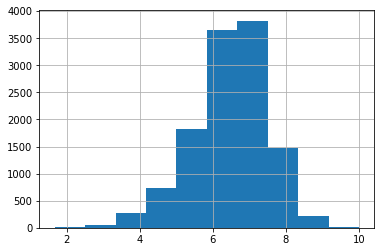

In [30]:
#Рейтинг
anime["rating"].hist();

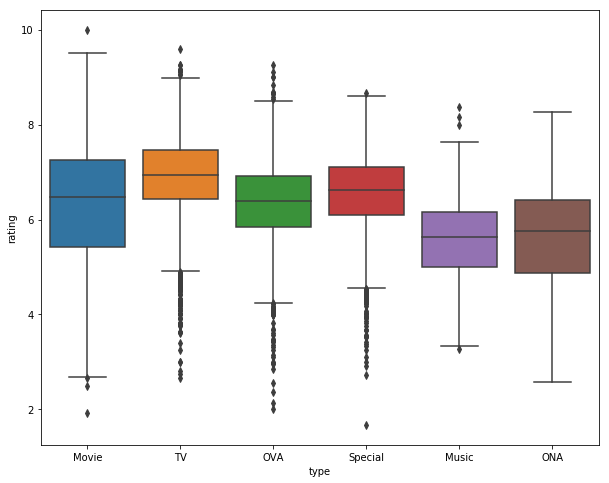

In [32]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=anime, x='type', y='rating');

In [33]:
#anime["rating"] = anime["rating"].astype(float)
#anime["rating"].fillna(anime["rating"].median(), inplace = True)
anime['rating'] = anime['rating'].fillna(
    anime.groupby('type')['rating'].transform('median')
)
anime["members"] = anime["members"].astype(int)

In [34]:
anime_features = pd.concat([
    anime["genre"].str.get_dummies(sep=", "),
    pd.get_dummies(anime[["type"]]),
    anime[["rating"]],
    anime[["members"]],
    anime["episodes"]
], axis=1)
anime["name"] = anime["name"].map(lambda name:re.sub('[^A-Za-z0-9]+', " ", name))
anime_features.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Yuri,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,rating,members,episodes
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,9.37,200630,1
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,9.26,793665,64
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.25,114262,51
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.17,673572,24
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.16,151266,51


In [36]:
#Количество жанров
anime_features.columns

Index(['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama',
       'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror',
       'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music',
       'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai',
       'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen',
       'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power',
       'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri', 'type_Movie',
       'type_Music', 'type_ONA', 'type_OVA', 'type_Special', 'type_TV',
       'rating', 'members', 'episodes'],
      dtype='object')

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
min_max_scaler = MinMaxScaler()
anime_features = min_max_scaler.fit_transform(anime_features)

In [41]:
np.round(anime_features, 2)

array([[0.  , 0.  , 0.  , ..., 0.92, 0.2 , 0.  ],
       [1.  , 1.  , 0.  , ..., 0.91, 0.78, 0.03],
       [1.  , 0.  , 0.  , ..., 0.91, 0.11, 0.03],
       ...,
       [0.  , 0.  , 0.  , ..., 0.39, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.4 , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.45, 0.  , 0.  ]])

In [42]:
#Метод K-ближайших соседей
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(anime_features)
distances, indices = nbrs.kneighbors(anime_features)

In [44]:
#Некоторые названия аниме написаны на японском
#Создадим вспомогательную функцию для для поиска id из части названия аниме
def get_index_from_name(name):
    return anime[anime["name"]==name].index.tolist()[0]

In [45]:
all_anime_names = list(anime.name.values)

In [46]:
def get_id_from_partial_name(partial):
    for name in all_anime_names:
        if partial in name:
            print(name,all_anime_names.index(name))

In [47]:
#Данная функция може искать аниме по id и по имени
def print_similar_animes(query=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(anime.ix[id]["name"])
    if query:
        found_id = get_index_from_name(query)
        for id in indices[found_id][1:]:
            print(anime.ix[id]["name"])

#### Примеры работы функций

##### Все ошибки на выходе - нормально

In [48]:
print_similar_animes(query="Naruto")

Naruto Shippuuden
Katekyo Hitman Reborn 
Bleach
Dragon Ball Z
Boku no Hero Academia


c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [49]:
print_similar_animes("Evangelion")

IndexError: list index out of range

In [50]:
print_similar_animes("Fairy Tail")

Fairy Tail 2014 
Magi The Labyrinth of Magic
Magi The Kingdom of Magic
Densetsu no Yuusha no Densetsu
Magi Sinbad no Bouken TV 


c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [51]:
print_similar_animes("Black Lagoon")

Black Lagoon The Second Barrage
Canaan
Gangsta 
Jormungand
Dimension W


c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [52]:
[name for name in anime.name if name.startswith("Macross")]

['Macross Do You Remember Love ',
 'Macross',
 'Macross F Movie 2 Sayonara no Tsubasa',
 'Macross F',
 'Macross F Movie 1 Itsuwari no Utahime',
 'Macross F Close Encounter Deculture Edition',
 'Macross Plus',
 'Macross Plus Movie Edition',
 'Macross Zero',
 'Macross F Music Clip Shuu Nyankuri',
 'Macross ',
 'Macross 7',
 'Macross 7 Encore',
 'Macross 7 Movie Ginga ga Ore wo Yondeiru ',
 'Macross Flash Back 2012',
 'Macross 7 Plus',
 'Macross Dynamite 7',
 'Macross F Choujikuu Gekijou',
 'Macross 25th Anniversary All That VF Macross F Version',
 'Macross 25th Anniversary All That VF Macross Zero Version',
 'Macross II Lovers Again',
 'Macross FB7 Ore no Uta wo Kike ',
 'Macross Fufonfia',
 'Macross XX',
 'Macross Fufonfia Specials']